<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/prodigy_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords  # Install using: pip install wordcloud nltk


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/prodigy task 4/twitter_training.csv')
train_df.columns = ['ID', 'Entity', 'Sentiment', 'text']
train_df

,ID,Entity,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/prodigy task 4/twitter_validation.csv')
test_df.columns = ['ID', 'Entity', 'Sentiment', 'text']
test_df

,ID,Entity,Sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df = pd.concat([train_df, test_df])

In [ ]:
df.columns

Index(['ID', 'Entity', 'Sentiment', 'text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75680 non-null  int64 
 1   Entity     75680 non-null  object
 2   Sentiment  75680 non-null  object
 3   text       74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df.drop('ID', axis=1, inplace=True)
train_df

,ID,Entity,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df.isna().any()

Entity       False
Sentiment    False
text          True
dtype: bool

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.text.duplicated().any()

True

In [ ]:
df.Sentiment.value_counts()

Negative      22624
Positive      20931
Neutral       18393
Irrelevant    13046
Name: Sentiment, dtype: int64

In [ ]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Fill NaN values in the 'Text' column with an empty string
df['text'].fillna('', inplace=True)

In [ ]:
# Remove stopwords from the 'Text' column
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


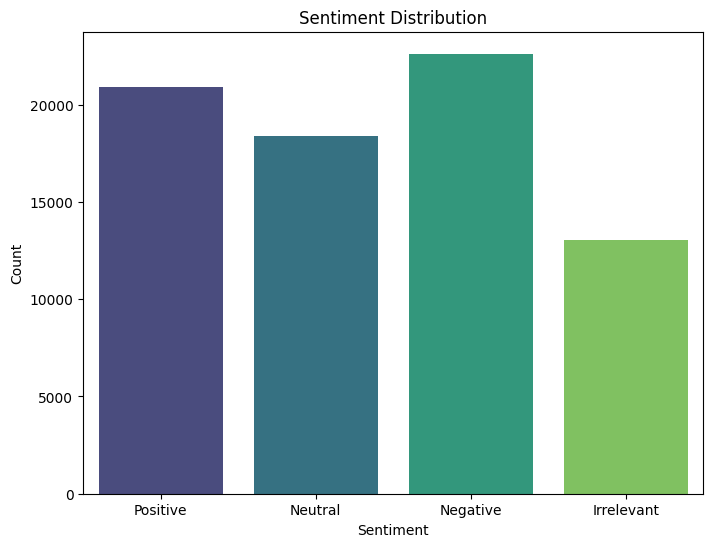

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

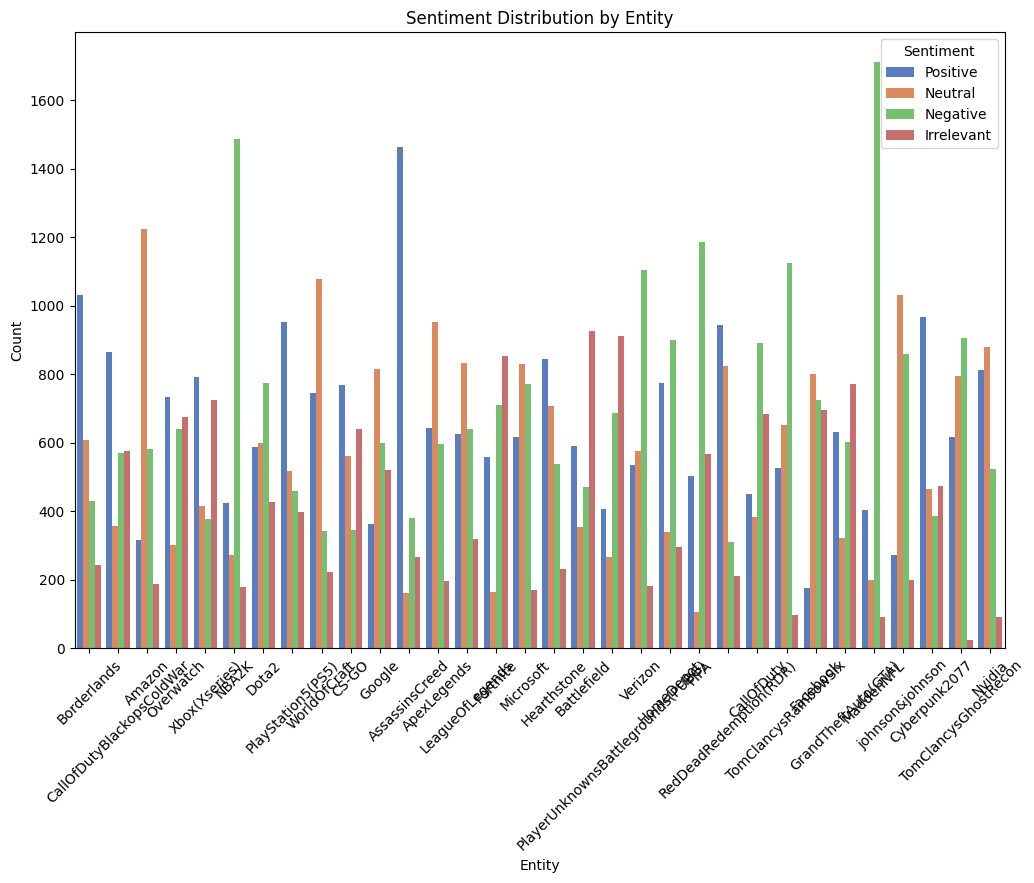

In [ ]:
# Visualize sentiment distribution by Entity
plt.figure(figsize=(12, 8))
sns.countplot(x='Entity', hue='Sentiment', data=df, palette='muted')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Function to generate word cloud
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

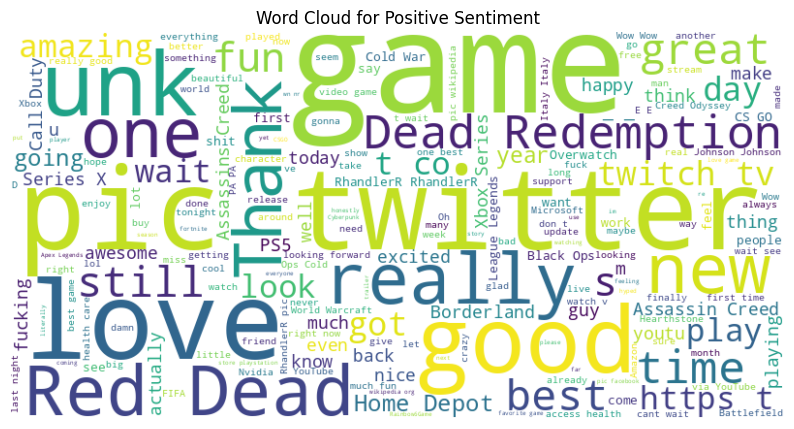

In [ ]:
# Generate word clouds for each sentiment
generate_wordcloud('Positive')

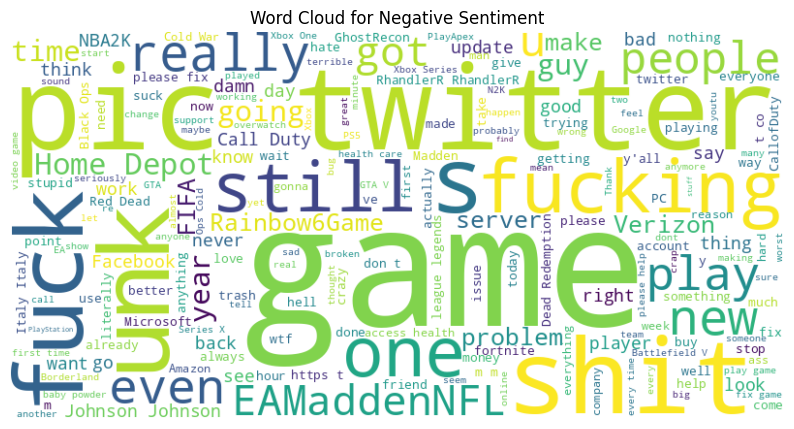

In [ ]:
generate_wordcloud('Negative')

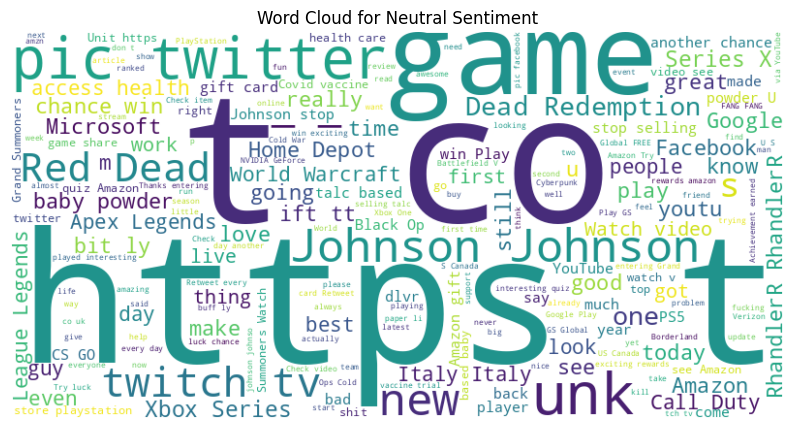

In [ ]:
generate_wordcloud('Neutral')

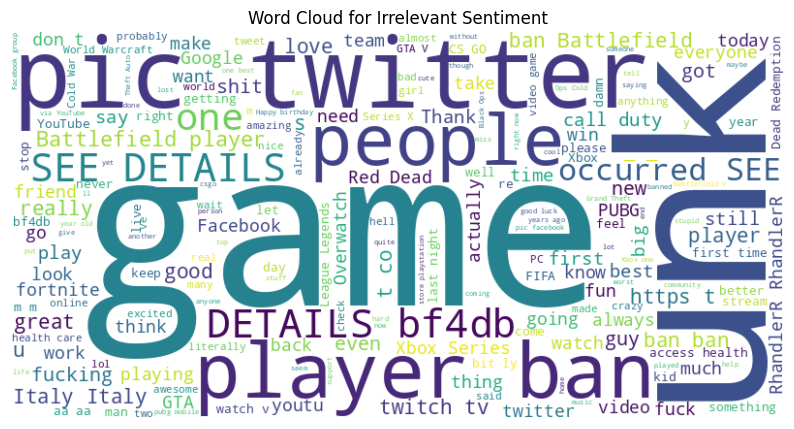

In [ ]:
generate_wordcloud('Irrelevant')